In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BI_Software_recommendation_dataset.csv')

### Display Rows of Dataset

In [3]:
df.head()

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
0,100001,Data Management,Utilities,Large,Business,Single,Cloud,Linux,Y,Freemium,4.5
1,100002,Database/ERP,Food,Large,Business,Single,On-Premise,Mac,Y,Freemium,4.5
2,100003,Data Analysis,Manufacturing,Large,Business,Single,On-Premise,Linux,N,Open Source,5.0
3,100004,Data Analysis,IT,Medium,Business,Mulitple,On-Premise,Mac,Y,Open Source,5.0
4,100005,Benchmarking,Food,Medium,Analyst,Mulitple,Cloud,Windows,N,Enterprise,4.2


In [4]:
df.tail()

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
95,100096,Predictive Analytics,Retail,Large,Business,Mulitple,Cloud,Mac,N,Freemium,4.2
96,100097,Monitoring,Pharma,Large,Business,Mulitple,Cloud,Mac,Y,Open Source,3.0
97,100098,Behavior analytics,IT,Medium,Analyst,Single,Hybrid,Mac,N,Open Source,3.0
98,100099,Ad-hoc reporting,Academia,Medium,Analyst,Mulitple,Hybrid,Linux,Y,Enterprise,4.5
99,100100,Ad-hoc reporting,Utilities,Small,Analyst,Single,Cloud,Windows,Y,Freemium,3.0


### Dataset Overview

In [5]:
print('size of dataset :',df.size)
print('No.of rows :',df.shape[0])
print('No.of columns :',df.shape[1])

size of dataset : 1100
No.of rows : 100
No.of columns : 11


In [6]:
df.columns

Index(['product_id', 'category', 'industry', 'Business_scale', 'user_type',
       'no_of_users', 'deployment', 'OS', 'mobile_apps', 'pricing', 'rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      100 non-null    int64  
 1   category        100 non-null    object 
 2   industry        100 non-null    object 
 3   Business_scale  100 non-null    object 
 4   user_type       100 non-null    object 
 5   no_of_users     100 non-null    object 
 6   deployment      100 non-null    object 
 7   OS              100 non-null    object 
 8   mobile_apps     100 non-null    object 
 9   pricing         100 non-null    object 
 10  rating          100 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


### Data Cleaning

In [8]:
df.isnull().sum()

product_id        0
category          0
industry          0
Business_scale    0
user_type         0
no_of_users       0
deployment        0
OS                0
mobile_apps       0
pricing           0
rating            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

product_id        100
category           18
industry           11
Business_scale      3
user_type           2
no_of_users         2
deployment          3
OS                  3
mobile_apps         2
pricing             3
rating              6
dtype: int64

### Statistical Summary about Dataframe

In [11]:
df.describe(include='all')

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
count,100.000000,100,100,100,100,100,100,100,100,100,100.000000
unique,NaN,18,11,3,2,2,3,3,2,3,NaN
top,NaN,Data Analysis,Manufacturing,Large,Business,Single,On-Premise,Mac,N,Enterprise,NaN
freq,NaN,10,12,38,50,54,39,40,54,37,NaN
mean,100050.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.070000
std,29.011492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663706
min,100001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,100025.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000
50%,100050.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000
75%,100075.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000


In [12]:
df['rating'].describe()

count    100.000000
mean       4.070000
std        0.663706
min        3.000000
25%        3.500000
50%        4.200000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

### Data Exploration

In [13]:
df['Business_scale'].value_counts() ,df['category'].value_counts()

(Large     38
 Medium    35
 Small     27
 Name: Business_scale, dtype: int64,
 Data Analysis           10
 Database/ERP             9
 Ad-hoc reporting         8
 Data Management          7
 ETL/ELT/OLAP             7
 Business Analytics       7
 Complete BI              6
 Predictive Analytics     5
 Embedded BI              5
 Dashboarding             5
 Web Analytics            5
 Benchmarking             5
 Monitoring               4
 KPI & Scorecard          4
 Behavior analytics       4
 Performance Metrics      3
 DWH                      3
 Data Discovery           3
 Name: category, dtype: int64)

In [14]:
df['industry'].value_counts()

Manufacturing         12
Academia              11
Utilities             10
Marketing             10
Fashion               10
Retail                10
IT                     9
Consultancy            9
Food                   8
Telecommunications     7
Pharma                 4
Name: industry, dtype: int64

In [15]:
df['category'].value_counts()

Data Analysis           10
Database/ERP             9
Ad-hoc reporting         8
Data Management          7
ETL/ELT/OLAP             7
Business Analytics       7
Complete BI              6
Predictive Analytics     5
Embedded BI              5
Dashboarding             5
Web Analytics            5
Benchmarking             5
Monitoring               4
KPI & Scorecard          4
Behavior analytics       4
Performance Metrics      3
DWH                      3
Data Discovery           3
Name: category, dtype: int64

In [16]:
df['user_type'].value_counts()

Business    50
Analyst     50
Name: user_type, dtype: int64

In [17]:
df['no_of_users'].value_counts()

Single      54
Mulitple    46
Name: no_of_users, dtype: int64

In [18]:
df['deployment'].value_counts()

On-Premise    39
Cloud         31
Hybrid        30
Name: deployment, dtype: int64

In [19]:
df['OS'].value_counts()

Mac        40
Windows    35
Linux      25
Name: OS, dtype: int64

In [20]:
df['mobile_apps'].value_counts()

N    54
Y    46
Name: mobile_apps, dtype: int64

In [21]:
df['pricing'].value_counts()

Enterprise     37
Freemium       32
Open Source    31
Name: pricing, dtype: int64

In [22]:
df['rating'].value_counts()

4.5    19
4.0    19
5.0    18
3.0    18
4.2    15
3.5    11
Name: rating, dtype: int64

### Finding Insight

**Checking for rating max,min,mean**

In [23]:
print(df['rating'].agg(['max','mean','min']))

max     5.00
mean    4.07
min     3.00
Name: rating, dtype: float64


**Unique Industries by Business Scale**

In [24]:
pd.set_option('display.max_colwidth', None)# use to set column width
df.groupby('Business_scale')['industry'].unique()

Business_scale
Large     [Utilities, Food, Manufacturing, Academia, Fashion, Consultancy, Retail, IT, Marketing, Telecommunications, Pharma]
Medium    [IT, Food, Marketing, Manufacturing, Telecommunications, Retail, Utilities, Fashion, Academia, Consultancy, Pharma]
Small     [Manufacturing, Consultancy, Retail, Telecommunications, Academia, Utilities, Pharma, Fashion, Marketing, Food, IT]
Name: industry, dtype: object

**Checking Unique Pricing**

In [25]:
df['pricing'].unique()

array(['Freemium', 'Open Source', 'Enterprise'], dtype=object)

**Analyzing Entries with Open Source Pricing**

In [26]:
df[df['pricing']=='Open Source']

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
2,100003,Data Analysis,Manufacturing,Large,Business,Single,On-Premise,Linux,N,Open Source,5.0
3,100004,Data Analysis,IT,Medium,Business,Mulitple,On-Premise,Mac,Y,Open Source,5.0
7,100008,DWH,Marketing,Medium,Analyst,Single,Cloud,Linux,Y,Open Source,4.0
8,100009,Database/ERP,Manufacturing,Medium,Business,Mulitple,Cloud,Windows,Y,Open Source,3.0
11,100012,DWH,Fashion,Large,Analyst,Single,Hybrid,Mac,N,Open Source,4.5
12,100013,Database/ERP,Retail,Medium,Business,Single,Hybrid,Mac,N,Open Source,3.5
13,100014,Performance Metrics,Utilities,Medium,Analyst,Single,Hybrid,Mac,N,Open Source,4.0
18,100019,Business Analytics,Consultancy,Large,Analyst,Mulitple,On-Premise,Mac,Y,Open Source,4.5
20,100021,Monitoring,Consultancy,Small,Analyst,Mulitple,Hybrid,Windows,N,Open Source,3.0
21,100022,Benchmarking,Retail,Small,Business,Single,On-Premise,Linux,N,Open Source,5.0


**Descriptive Statistics of Ratings for Open Source Pricing**

In [27]:
df[df['pricing'] == 'Open Source']['rating'].describe()

count    31.000000
mean      4.064516
std       0.684859
min       3.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

**Analyzing Entries with Enterprise Pricing**

In [28]:
df[df['pricing']=='Enterprise']

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
4,100005,Benchmarking,Food,Medium,Analyst,Mulitple,Cloud,Windows,N,Enterprise,4.2
9,100010,Data Management,Telecommunications,Medium,Analyst,Mulitple,Hybrid,Linux,Y,Enterprise,4.0
14,100015,Web Analytics,IT,Medium,Analyst,Mulitple,Cloud,Windows,N,Enterprise,4.0
16,100017,Ad-hoc reporting,Retail,Medium,Business,Mulitple,On-Premise,Windows,N,Enterprise,3.0
17,100018,Database/ERP,Utilities,Medium,Business,Single,On-Premise,Windows,N,Enterprise,4.2
22,100023,ETL/ELT/OLAP,Telecommunications,Small,Business,Single,Cloud,Windows,N,Enterprise,5.0
24,100025,Performance Metrics,Academia,Large,Business,Mulitple,Cloud,Mac,N,Enterprise,3.0
27,100028,Data Management,Fashion,Medium,Business,Single,On-Premise,Windows,Y,Enterprise,4.0
30,100031,KPI & Scorecard,Consultancy,Small,Business,Mulitple,On-Premise,Mac,Y,Enterprise,3.0
31,100032,Data Management,Pharma,Small,Business,Mulitple,Cloud,Mac,N,Enterprise,4.5


**Descriptive Statistics of Ratings for Open Source Pricing**

In [29]:
df[df['pricing'] == 'Enterprise']['rating'].describe()

count    37.000000
mean      4.100000
std       0.689605
min       3.000000
25%       3.500000
50%       4.200000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

**Descriptive Statistics of Ratings for Freemuim Pricing**

In [30]:
df[df['pricing'] == 'Freemium']

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
0,100001,Data Management,Utilities,Large,Business,Single,Cloud,Linux,Y,Freemium,4.5
1,100002,Database/ERP,Food,Large,Business,Single,On-Premise,Mac,Y,Freemium,4.5
5,100006,Data Analysis,Academia,Large,Analyst,Mulitple,Hybrid,Windows,Y,Freemium,4.5
6,100007,Complete BI,IT,Medium,Business,Single,On-Premise,Linux,Y,Freemium,4.2
10,100011,Business Analytics,Manufacturing,Large,Business,Mulitple,Hybrid,Linux,N,Freemium,5.0
15,100016,Dashboarding,Manufacturing,Small,Analyst,Single,Hybrid,Mac,Y,Freemium,5.0
19,100020,Embedded BI,Retail,Large,Analyst,Mulitple,Hybrid,Mac,Y,Freemium,4.5
23,100024,Business Analytics,Academia,Small,Business,Single,On-Premise,Windows,Y,Freemium,4.0
28,100029,Data Analysis,Utilities,Small,Analyst,Mulitple,Hybrid,Windows,Y,Freemium,4.5
29,100030,Predictive Analytics,Food,Medium,Analyst,Single,On-Premise,Windows,N,Freemium,4.5


**Descriptive Statistics of Ratings for Freemium Pricing**

In [31]:
print(df[df['pricing'] == 'Freemium']['rating'].describe())

count    32.000000
mean      4.040625
std       0.631363
min       3.000000
25%       3.500000
50%       4.200000
75%       4.500000
max       5.000000
Name: rating, dtype: float64


**Unique Industries by Pricing Category**

In [32]:
unique_industries_by_pricing=df.groupby('pricing')['industry'].unique()
for pricing,industry in unique_industries_by_pricing.items():
     print(pricing,':',industry,end='\n')

Enterprise : ['Food' 'Telecommunications' 'IT' 'Retail' 'Utilities' 'Academia'
 'Fashion' 'Consultancy' 'Pharma' 'Marketing' 'Manufacturing']
Freemium : ['Utilities' 'Food' 'Academia' 'IT' 'Manufacturing' 'Retail' 'Fashion'
 'Marketing' 'Telecommunications' 'Pharma']
Open Source : ['Manufacturing' 'IT' 'Marketing' 'Fashion' 'Retail' 'Utilities'
 'Consultancy' 'Academia' 'Telecommunications' 'Food' 'Pharma']


**Enterprise Pricing: User Type and Number of Users**

In [33]:
Enterprise_pivot= df[df['pricing'] == 'Enterprise'].pivot_table(index='user_type',columns='no_of_users',aggfunc='size',fill_value=0)
print(Enterprise_pivot)

no_of_users  Mulitple  Single
user_type                    
Analyst            11       5
Business           12       9


**OpenSource Pricing: User Type and Number of Users**

In [34]:
Opensource_pivot= df[df['pricing'] == 'Open Source'].pivot_table(index='user_type',columns='no_of_users',aggfunc='size',fill_value=0)
print(Opensource_pivot)

no_of_users  Mulitple  Single
user_type                    
Analyst             4      13
Business            8       6


**Freemium Pricing: User Type and Number of Users**

In [35]:
Freemium_pivot= df[df['pricing'] == 'Freemium'].pivot_table(index='user_type',columns='no_of_users',aggfunc='size',fill_value=0)
print(Freemium_pivot)

no_of_users  Mulitple  Single
user_type                    
Analyst             6      11
Business            5      10


**Extracting Columns: Category, OS, and Mobile Apps**

In [36]:
df[['category','OS','mobile_apps']]

,category,OS,mobile_apps
0,Data Management,Linux,Y
1,Database/ERP,Mac,Y
2,Data Analysis,Linux,N
3,Data Analysis,Mac,Y
4,Benchmarking,Windows,N
...,...,...,...
95,Predictive Analytics,Mac,N
96,Monitoring,Mac,Y
97,Behavior analytics,Mac,N
98,Ad-hoc reporting,Linux,Y


**Extracting Rows from Index 2 to 5**

In [37]:
df.loc[2:5]

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
2,100003,Data Analysis,Manufacturing,Large,Business,Single,On-Premise,Linux,N,Open Source,5.0
3,100004,Data Analysis,IT,Medium,Business,Mulitple,On-Premise,Mac,Y,Open Source,5.0
4,100005,Benchmarking,Food,Medium,Analyst,Mulitple,Cloud,Windows,N,Enterprise,4.2
5,100006,Data Analysis,Academia,Large,Analyst,Mulitple,Hybrid,Windows,Y,Freemium,4.5


**Extracting Row at Index 5**

In [38]:
df.loc[5]

product_id               100006
category          Data Analysis
industry               Academia
Business_scale            Large
user_type               Analyst
no_of_users            Mulitple
deployment               Hybrid
OS                      Windows
mobile_apps                   Y
pricing                Freemium
rating                      4.5
Name: 5, dtype: object

**Extracting Columns from Index 1 to 5**

In [39]:
df.iloc[:,1:6]

,category,industry,Business_scale,user_type,no_of_users
0,Data Management,Utilities,Large,Business,Single
1,Database/ERP,Food,Large,Business,Single
2,Data Analysis,Manufacturing,Large,Business,Single
3,Data Analysis,IT,Medium,Business,Mulitple
4,Benchmarking,Food,Medium,Analyst,Mulitple
...,...,...,...,...,...
95,Predictive Analytics,Retail,Large,Business,Mulitple
96,Monitoring,Pharma,Large,Business,Mulitple
97,Behavior analytics,IT,Medium,Analyst,Single
98,Ad-hoc reporting,Academia,Medium,Analyst,Mulitple


**Unique Categories by OS**

In [40]:
unique_category_os=df.groupby('OS')['category'].unique()
for OS,category in unique_category_os.items():
    print(f"\n{OS}:")
    for category in category:
             print(f" -{category}")


Linux:
 -Data Management
 -Data Analysis
 -Complete BI
 -DWH
 -Business Analytics
 -Benchmarking
 -KPI & Scorecard
 -Dashboarding
 -ETL/ELT/OLAP
 -Performance Metrics
 -Monitoring
 -Database/ERP
 -Behavior analytics
 -Ad-hoc reporting

Mac:
 -Database/ERP
 -Data Analysis
 -DWH
 -Performance Metrics
 -Dashboarding
 -Business Analytics
 -Embedded BI
 -KPI & Scorecard
 -Data Management
 -ETL/ELT/OLAP
 -Benchmarking
 -Complete BI
 -Ad-hoc reporting
 -Predictive Analytics
 -Web Analytics
 -Data Discovery
 -Monitoring
 -Behavior analytics

Windows:
 -Benchmarking
 -Data Analysis
 -Database/ERP
 -Web Analytics
 -Ad-hoc reporting
 -Monitoring
 -ETL/ELT/OLAP
 -Business Analytics
 -Data Management
 -Predictive Analytics
 -Behavior analytics
 -KPI & Scorecard
 -Embedded BI
 -Complete BI
 -Dashboarding


**Top 10 Categories with Highest Ratings**

In [41]:
category_ratings = df.groupby('category')['rating'].max()
top_10_categories = category_ratings.nlargest(10)
print(top_10_categories)


category
Ad-hoc reporting      5.0
Benchmarking          5.0
Business Analytics    5.0
Dashboarding          5.0
Data Analysis         5.0
Data Management       5.0
ETL/ELT/OLAP          5.0
Embedded BI           5.0
KPI & Scorecard       5.0
Web Analytics         5.0
Name: rating, dtype: float64


**Filtering Rows with Ratings Between 3.0 and 4.0**

In [42]:
df[df['rating'].between(3.0,4.0)]

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
7,100008,DWH,Marketing,Medium,Analyst,Single,Cloud,Linux,Y,Open Source,4.0
8,100009,Database/ERP,Manufacturing,Medium,Business,Mulitple,Cloud,Windows,Y,Open Source,3.0
9,100010,Data Management,Telecommunications,Medium,Analyst,Mulitple,Hybrid,Linux,Y,Enterprise,4.0
12,100013,Database/ERP,Retail,Medium,Business,Single,Hybrid,Mac,N,Open Source,3.5
13,100014,Performance Metrics,Utilities,Medium,Analyst,Single,Hybrid,Mac,N,Open Source,4.0
14,100015,Web Analytics,IT,Medium,Analyst,Mulitple,Cloud,Windows,N,Enterprise,4.0
16,100017,Ad-hoc reporting,Retail,Medium,Business,Mulitple,On-Premise,Windows,N,Enterprise,3.0
20,100021,Monitoring,Consultancy,Small,Analyst,Mulitple,Hybrid,Windows,N,Open Source,3.0
23,100024,Business Analytics,Academia,Small,Business,Single,On-Premise,Windows,Y,Freemium,4.0
24,100025,Performance Metrics,Academia,Large,Business,Mulitple,Cloud,Mac,N,Enterprise,3.0


**Average Rating by Category, Industry, and Business Scale (Ratings Below 4)**

In [43]:
filtered_df = df[df['rating'] < 4]
grouped_summary = filtered_df.groupby(['category', 'industry', 'Business_scale']).agg(avg_rating=('rating', 'mean'))
sorted_summary = grouped_summary.sort_values(by='avg_rating')
print(sorted_summary)

                                                        avg_rating
category             industry           Business_scale            
Monitoring           Pharma             Large                 3.00
ETL/ELT/OLAP         Fashion            Small                 3.00
Database/ERP         Retail             Large                 3.00
                     Manufacturing      Medium                3.00
Web Analytics        Fashion            Medium                3.00
Data Discovery       Consultancy        Large                 3.00
Dashboarding         Marketing          Medium                3.00
Monitoring           Consultancy        Small                 3.00
KPI & Scorecard      Consultancy        Small                 3.00
Predictive Analytics Manufacturing      Medium                3.00
Business Analytics   Telecommunications Large                 3.00
                     Manufacturing      Large                 3.00
Behavior analytics   IT                 Medium                

**Summary of Ratings (3.0 to 4.0) by Category**


In [44]:
filtered_df = df[df['rating'].between(3, 4)]
grouped_summary = filtered_df.groupby('category').agg( count=('rating', 'size'), avg_rating=('rating', 'mean'))
print(grouped_summary)

                      count  avg_rating
category                               
Ad-hoc reporting          4    3.250000
Behavior analytics        2    3.500000
Benchmarking              1    4.000000
Business Analytics        3    3.333333
Complete BI               2    3.750000
DWH                       2    3.750000
Dashboarding              3    3.500000
Data Analysis             3    3.500000
Data Discovery            2    3.500000
Data Management           4    3.875000
Database/ERP              6    3.583333
ETL/ELT/OLAP              2    3.500000
Embedded BI               1    3.500000
KPI & Scorecard           2    3.500000
Monitoring                3    3.166667
Performance Metrics       2    3.500000
Predictive Analytics      3    3.333333
Web Analytics             3    3.500000


**Unique Ratings in the Dataset**

In [45]:
df['rating'].unique()

array([4.5, 5. , 4.2, 4. , 3. , 3.5])

**Minimum Ratings by Category (Ratings Below 4.0)**

In [46]:
result=df[df['rating']<4.0]
result.groupby('category').min()

,product_id,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
category,,,,,,,,,,
Ad-hoc reporting,100017,Fashion,Medium,Analyst,Mulitple,Cloud,Mac,N,Enterprise,3.0
Behavior analytics,100098,IT,Medium,Analyst,Single,Hybrid,Mac,N,Open Source,3.0
Business Analytics,100037,Manufacturing,Large,Analyst,Single,On-Premise,Mac,Y,Enterprise,3.0
Complete BI,100079,Consultancy,Medium,Business,Single,Hybrid,Mac,Y,Enterprise,3.5
DWH,100088,Academia,Medium,Analyst,Single,Cloud,Mac,Y,Freemium,3.5
Dashboarding,100071,Food,Medium,Analyst,Single,Cloud,Linux,Y,Open Source,3.0
Data Analysis,100093,Marketing,Large,Analyst,Mulitple,Cloud,Linux,Y,Enterprise,3.0
Data Discovery,100061,Consultancy,Large,Analyst,Mulitple,On-Premise,Mac,N,Enterprise,3.0
Data Management,100065,Fashion,Large,Business,Single,Hybrid,Mac,Y,Open Source,3.5


### Visualization

**Rating Distribution**

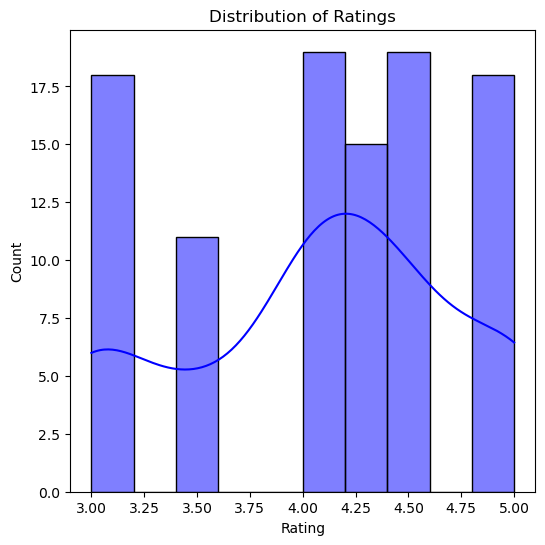

In [47]:
plt.figure(figsize=(6, 6))
sns.histplot(df['rating'], kde=True, color='blue', bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Ratings by Category**

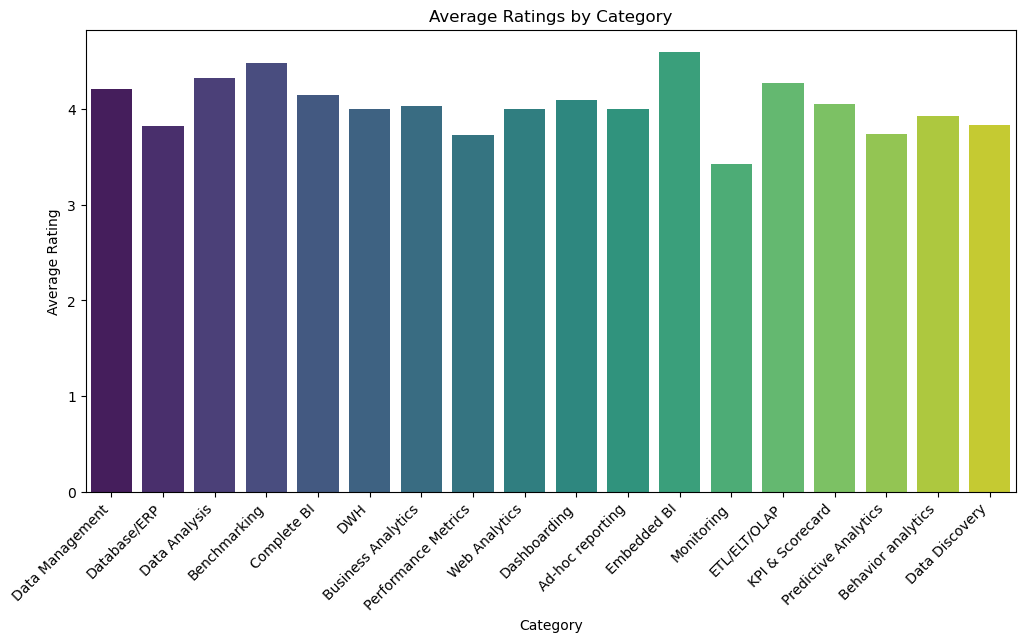

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='rating', data=df, ci=None, palette='viridis')
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

**Ratings by Industry**

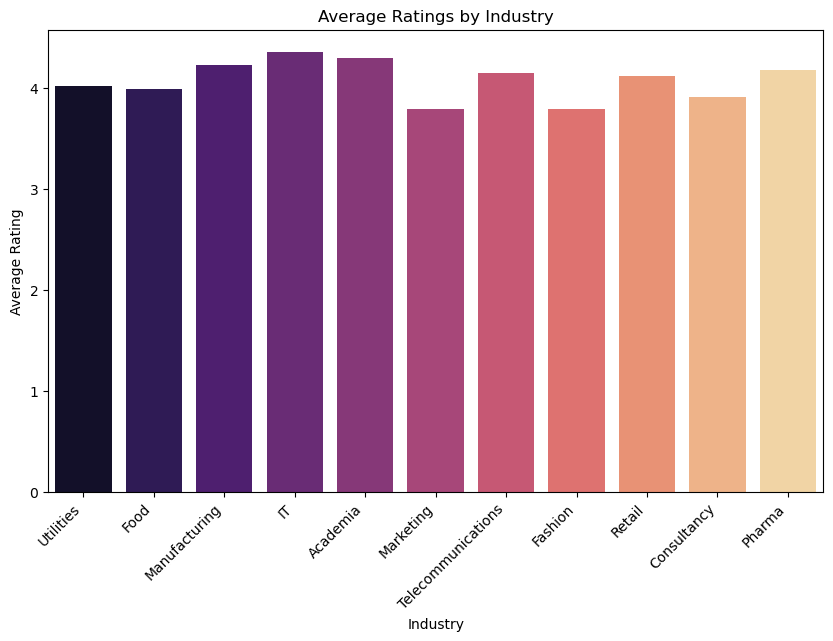

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='industry', y='rating', data=df, ci=None, palette='magma')
plt.title('Average Ratings by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

**Ratings by Business Scale**

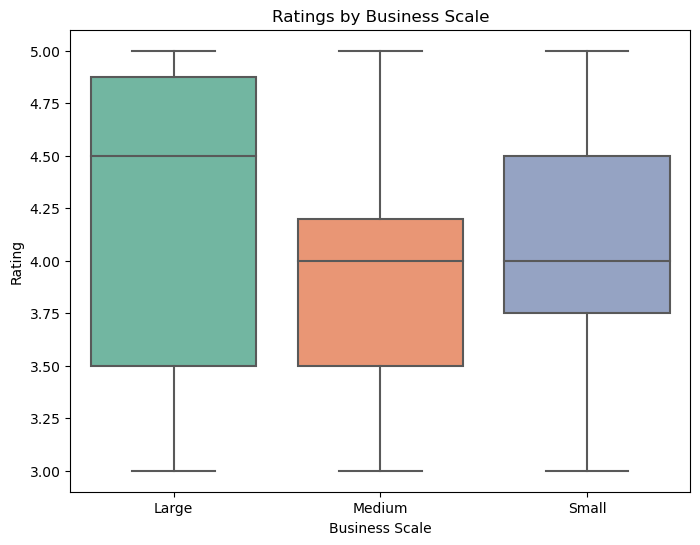

In [50]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Business_scale', y='rating', data=df, palette='Set2')
plt.title('Ratings by Business Scale')
plt.xlabel('Business Scale')
plt.ylabel('Rating')
plt.show()

**Ratings by Deployment Type**

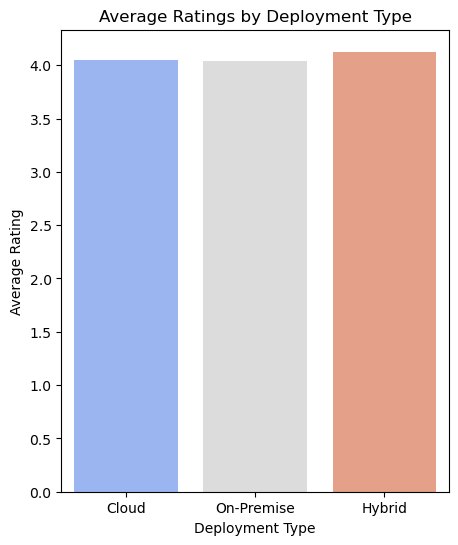

In [51]:
plt.figure(figsize=(5, 6))
sns.barplot(x='deployment', y='rating', data=df, ci=None, palette='coolwarm')
plt.title('Average Ratings by Deployment Type')
plt.xlabel('Deployment Type')
plt.ylabel('Average Rating')
plt.show()

**Pricing vs. Rating**

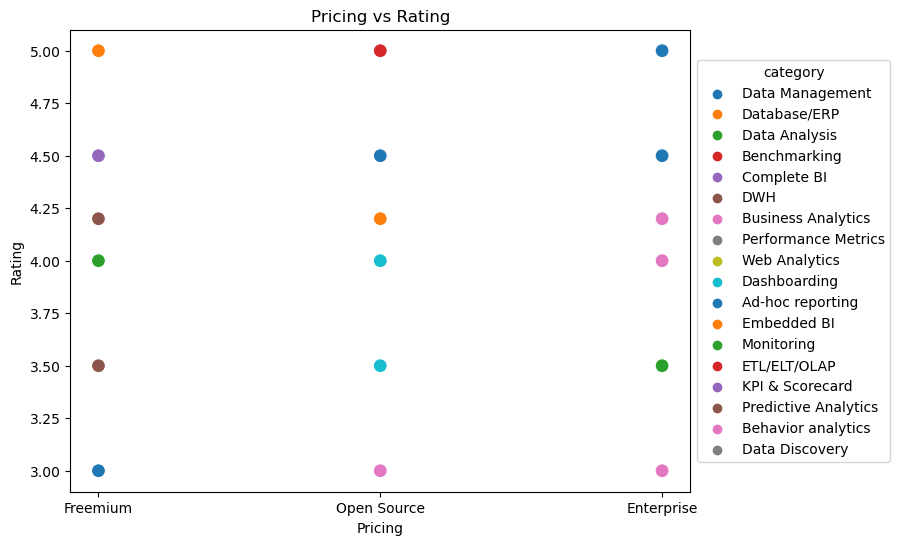

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pricing', y='rating', data=df, hue='category', palette='tab10', s=100)
plt.title('Pricing vs Rating')
plt.xlabel('Pricing')
plt.ylabel('Rating')
plt.legend(title='category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


**User Scale vs. Rating**

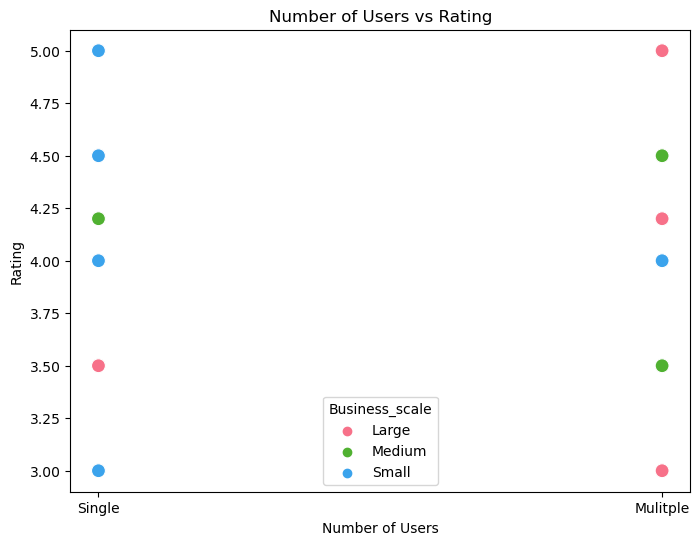

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='no_of_users', y='rating', data=df, hue='Business_scale', palette='husl', s=100)
plt.title('Number of Users vs Rating')
plt.xlabel('Number of Users')
plt.ylabel('Rating')
plt.show()


**Category Distribution Pie Chart**

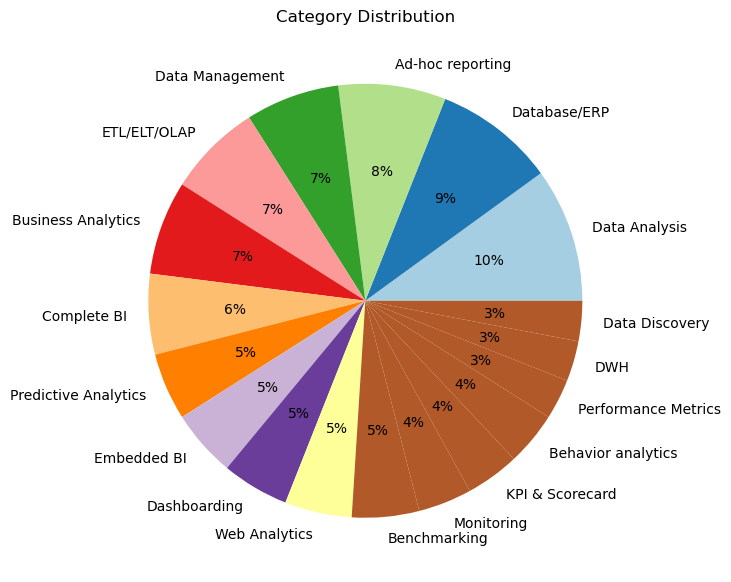

In [54]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(7, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', colors=plt.cm.Paired(range(len(category_counts))))
plt.title('Category Distribution')
plt.show()


**OS and Mobile App Support vs. Rating**

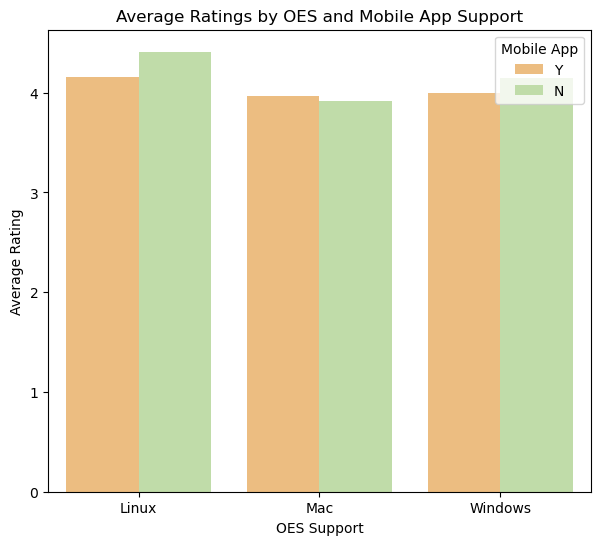

In [56]:
 plt.figure(figsize=(7, 6))
sns.barplot(x='OS', y='rating', hue='mobile_apps', data=df, ci=None, palette='Spectral')
plt.title('Average Ratings by OES and Mobile App Support')
plt.xlabel('OES Support')
plt.ylabel('Average Rating')
plt.legend(title='Mobile App', loc='upper right')
plt.show()